Test iNNvestigae 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [1]:
# from tensorflow import keras
# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras.models import Model

import keras
from keras.layers import Input, Dense
from keras.models import Model

import innvestigate
import innvestigate.utils as iutils

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
mnist = keras.datasets.mnist
(X_train, label_train), (X_test, label_test) = mnist.load_data()
image_size = X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [3]:
input_size = 784
hidden_size = 64
output_size = 784

x = Input(shape=(input_size,))

# Encoder
h = Dense(hidden_size, activation='relu')(x)

# Decoder
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [4]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                          validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0454 - val_loss: 0.0223
Epoch 2/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0168 - val_loss: 0.0124
Epoch 3/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0105 - val_loss: 0.0084
Epoch 4/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.0076 - val_loss: 0.0064
Epoch 5/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.0061 - val_loss: 0.0054


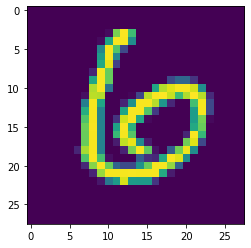

In [124]:
image = X_test[11]
plt.imshow(image.reshape(28, 28))

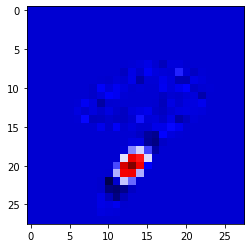

In [30]:

# Creating an analyzer
gradient_analyzer = innvestigate.create_analyzer("lrp.z", autoencoder)

# Applying the analyzer
analysis = gradient_analyzer.analyze(image.reshape(1,784))

plt.imshow(analysis.reshape(28, 28), cmap='seismic', interpolation='nearest')
plt.show()

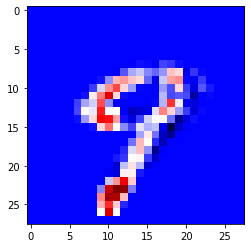

In [31]:
conv_encoder = Model(x, h)
gradient_analyzer = innvestigate.create_analyzer("lrp.z",conv_encoder)
analysis = gradient_analyzer.analyze(image.reshape(1,784))
plt.imshow(analysis.reshape(28, 28), cmap='seismic', interpolation='nearest')
plt.show()

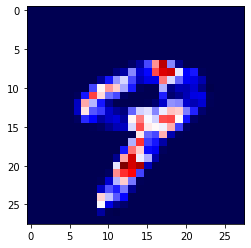

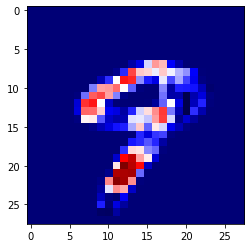

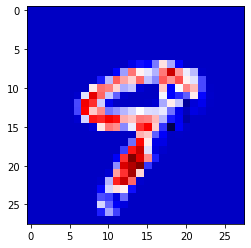

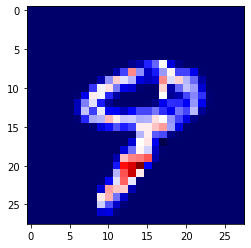

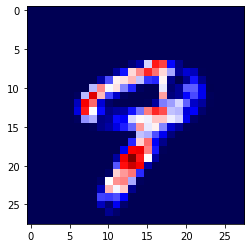

In [82]:
gradient_analyzer = innvestigate.create_analyzer("lrp.epsilon", autoencoder, neuron_selection_mode="index")
for neuron_index in range(5):
    analysis = gradient_analyzer.analyze(image.reshape(1,784), neuron_index)
    plt.imshow(analysis.reshape(28, 28), cmap='seismic', interpolation='nearest')
    plt.show()

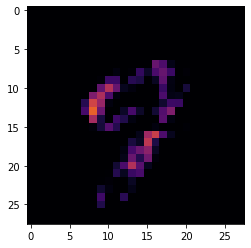

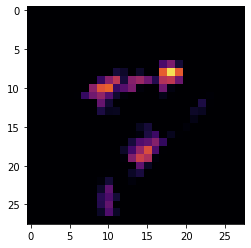

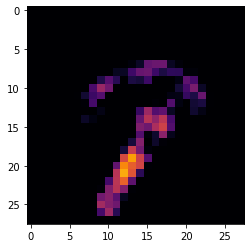

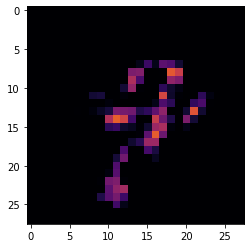

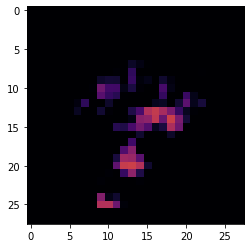

In [116]:
gradient_analyzer = innvestigate.create_analyzer("lrp.epsilon", conv_encoder, neuron_selection_mode="index")
for neuron_index in range(5):
    analysis = gradient_analyzer.analyze(image.reshape(1,784), neuron_index)
    plt.imshow(analysis.reshape(28, 28), cmap='inferno', interpolation='nearest', vmin=0, vmax=0.5)
    plt.show()

In [148]:
analysis = gradient_analyzer.analyze(image.reshape(1,784), 63)

In [149]:
analysis.shape

(1, 784)

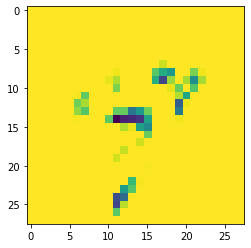

In [80]:
test = np.where(analysis >0, 0, analysis)

plt.imshow(test.reshape(28, 28))
plt.show()

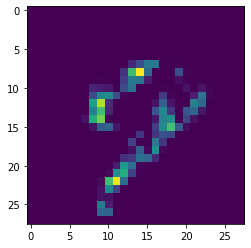

In [81]:
test = np.where(analysis <0, 0, analysis)

plt.imshow(test.reshape(28, 28))
plt.show()

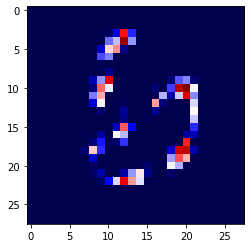

In [150]:
plt.imshow(analysis.reshape(28, 28), cmap='seismic')
plt.show()

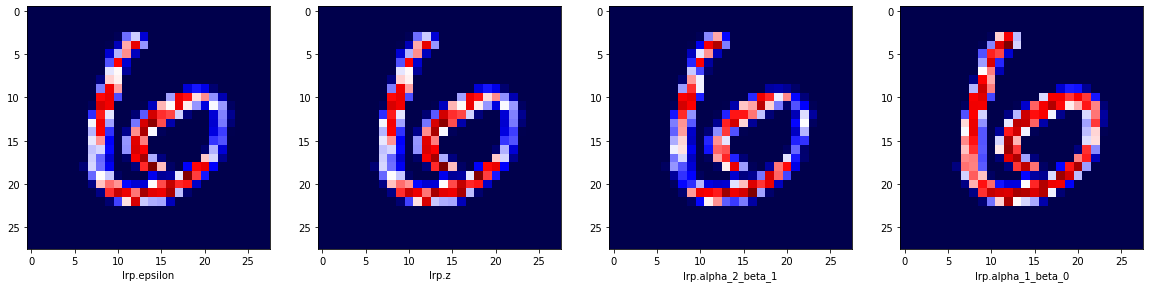

In [146]:
methods = ["lrp.epsilon","lrp.z",'lrp.alpha_2_beta_1','lrp.alpha_1_beta_0']
plt.figure(figsize=(20,10))
for i in range(len(methods)):

    gradient_analyzer = innvestigate.create_analyzer(methods[i], conv_encoder, neuron_selection_mode="index")
    img_sum = np.zeros(shape=(1, 784))
    for neuron_index in range(hidden_size):
        img_sum += gradient_analyzer.analyze(image.reshape(1,784), neuron_index)

    plt.subplot(1,len(methods), i+1)
    plt.imshow(img_sum.reshape(28, 28), cmap='seismic')
    plt.xlabel(methods[i])
plt.show()
